In [2]:
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVR, LinearSVR, SVC
from sklearn.preprocessing import scale
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, mean_squared_log_error, r2_score
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier, GradientBoostingRegressor, RandomForestRegressor, VotingRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.inspection import partial_dependence, plot_partial_dependence
from mpl_toolkits.mplot3d import Axes3D

In [3]:
rw = pd.read_csv("data/rw_continuous_expB.csv", sep=",")
ww = pd.read_csv("data/ww_continuous_exp.csv", sep=",")
colors = ['r', 'y']
print(rw.shape)
print(ww.shape)

#Drop max outlier
#rw.drop(rw.loc[rw['new_quality'].idxmax()].name, inplace=True)
#ww.drop(ww.loc[ww['new_quality'].idxmax()].name, inplace=True)

#Drop min outlier - MAKES IT WORSE
#rw.drop(rw.loc[data['new_quality'].idxmin()].name, inplace=True)
#ww.drop(ww.loc[data['new_quality'].idxmin()].name, inplace=True)


(1598, 14)
(4898, 14)


In [4]:
#data=ww.append(rw)
data=rw
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0           10.2              0.54         0.37            15.4      0.214   
1           10.2              0.54         0.37            15.4      0.214   
2            9.9              0.50         0.50            13.8      0.205   
3            9.9              0.50         0.50            13.8      0.205   
4            7.9              0.30         0.68             8.3      0.050   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 55.0                  95.0  1.00369  3.18       0.77   
1                 55.0                  95.0  1.00369  3.18       0.77   
2                 48.0                  82.0  1.00242  3.16       0.75   
3                 48.0                  82.0  1.00242  3.16       0.75   
4                 37.5                 289.0  0.99316  3.01       0.51   

   alcohol  quality         add  new_quality  
0      9.0      600  714.603888  1314.603888  
1      9.0      600  714.603888  1314.603888  
2      8.8      500  582.720495  1082.720495  
3      8.8      500  582.720495  1082.720495  
4     12.3      700  558.645184  1258.645184

In [5]:
column_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
label_names = ['quality', 'add', 'new_quality']
X_train, X_test, y_temp_train, y_temp_test = train_test_split(data[column_names], data[label_names], test_size=0.2, random_state=20)

In [6]:
maxdf = np.asmatrix(data.max())
#print(maxdf)
print(np.transpose(maxdf))


[[1.59000000e+01]
 [1.58000000e+00]
 [7.90000000e-01]
 [1.55000000e+01]
 [6.11000000e-01]
 [7.20000000e+01]
 [2.89000000e+02]
 [1.00369000e+00]
 [4.01000000e+00]
 [1.98000000e+00]
 [1.49000000e+01]
 [8.00000000e+02]
 [7.14603888e+02]
 [1.31460389e+03]]


In [7]:
y_train = y_temp_train['new_quality']
y_test = y_temp_test['new_quality']
y_test

1508    562.490071
718     704.821743
1370    572.020430
579     616.696608
498     821.019951
1586    550.624476
531     719.393628
254     653.289930
698     508.434625
665     807.570807
1297    674.494509
472     723.449064
756     504.120421
700     706.130733
1476    564.982343
545     520.432482
338     639.874209
945     593.310595
841     598.782092
1458    567.098009
1348    672.186645
1172    681.610069
20      821.705474
731     704.037829
1011    589.951830
779     799.975391
479     624.197620
83      810.052624
1427    668.484705
1549    558.464403
           ...    
1346    573.458849
1119    585.119893
1318    574.689632
1223    679.035197
514     622.081914
279     451.084110
553     717.439753
702     705.982375
328     740.438362
1350    672.096306
226     756.645101
117     894.182127
542     817.805323
1051    687.302669
486     722.900520
842     697.762100
1232    579.588768
782     700.847573
298     745.822533
946     395.282708
974     690.583476
799     799.

In [8]:
maxvals = np.transpose(maxdf[:, [0,1,2,3,4,5,6,7,8,9,10]])
calc_add = np.dot(np.asmatrix(X_test), 1/maxvals)
#maxvals
calc_add

matrix([[4.18292483],
        [4.75941696],
        [4.3088671 ],
        [4.87050255],
        [4.90581989],
        [3.98042802],
        [4.84244053],
        [5.11997014],
        [4.71029206],
        [4.7950979 ],
        [4.32428762],
        [4.98933905],
        [4.72787072],
        [4.66795449],
        [4.17694387],
        [4.92703097],
        [5.0765842 ],
        [4.63711637],
        [4.63295981],
        [4.20898265],
        [4.28147728],
        [4.42710736],
        [5.78162967],
        [4.73029095],
        [4.60531892],
        [4.69688801],
        [4.90971508],
        [5.53215799],
        [4.22953972],
        [4.08172776],
        [4.54163312],
        [4.59319383],
        [4.94407169],
        [4.53175903],
        [4.58420446],
        [5.03503111],
        [5.10330612],
        [5.33472145],
        [4.24157353],
        [4.55352841],
        [5.49459335],
        [5.38000871],
        [4.47279448],
        [5.00027076],
        [4.93820603],
        [4

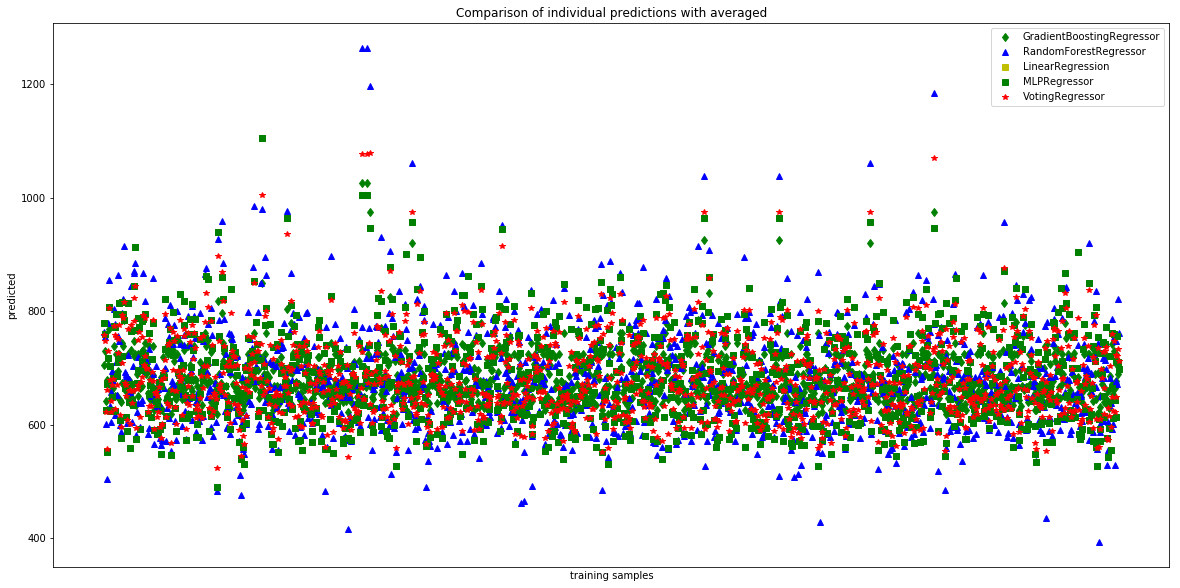


Score
GradientBoostingRegressor 0.3630207341805989
RandomForestRegressor     0.5470977410379453
LinearRegression          0.5256906326496356
MLPRegressor              0.5328211205587201
VotingRegressor           0.561770635728255

Mean Squared Error
GradientBoostingRegressor 6278.210523370644
RandomForestRegressor     4463.906253865546
LinearRegression          4674.899515923353
MLPRegressor              4604.619827666947
VotingRegressor           4319.286912552276

Mean Squared_Log_Error
GradientBoostingRegressor 0.014861814178377019
RandomForestRegressor     0.010951011164262373
LinearRegression          0.011280625951452572
MLPRegressor              0.011212156975462063
VotingRegressor           0.010634926859779858

R-squared
GradientBoostingRegressor 0.3630207341805989
RandomForestRegressor     0.5470977410379453
LinearRegression          0.5256906326496356
MLPRegressor              0.5328211205587201
VotingRegressor           0.561770635728255


In [9]:
reg1 = GradientBoostingRegressor(random_state=1, n_estimators=10)
reg2 = RandomForestRegressor(random_state=1, n_estimators=10)
reg3 = LinearRegression()
reg4 = MLPRegressor(solver='adam', learning_rate_init=0.001, momentum=0, activation='relu', max_iter=10000)
ereg = VotingRegressor([('gb', reg1), ('rf', reg2), ('lr', reg3), ('mlp', reg4)])

reg1.fit(X_train, y_train)
reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)
reg4.fit(X_train, y_train)
ereg.fit(X_train, y_train)

xt = X_train[:]

plt.figure(figsize=(20, 10))
plt.plot(reg1.predict(xt), 'gd', label='GradientBoostingRegressor')
plt.plot(reg2.predict(xt), 'b^', label='RandomForestRegressor')
plt.plot(reg3.predict(xt), 'ys', label='LinearRegression')
plt.plot(reg3.predict(xt), 'gs', label='MLPRegressor')
plt.plot(ereg.predict(xt), 'r*', label='VotingRegressor')
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Comparison of individual predictions with averaged')
plt.show()

print("\nScore")
print("GradientBoostingRegressor {0}".format(reg1.score(X_test, y_test)))
print("RandomForestRegressor     {0}".format(reg2.score(X_test, y_test)))
print("LinearRegression          {0}".format(reg3.score(X_test, y_test)))
print("MLPRegressor              {0}".format(reg4.score(X_test, y_test)))
print("VotingRegressor           {0}".format(ereg.score(X_test, y_test)))
print("\nMean Squared Error")
print("GradientBoostingRegressor {0}".format(mean_squared_error(y_test, reg1.predict(X_test))))
print("RandomForestRegressor     {0}".format(mean_squared_error(y_test, reg2.predict(X_test))))
print("LinearRegression          {0}".format(mean_squared_error(y_test, reg3.predict(X_test))))
print("MLPRegressor              {0}".format(mean_squared_error(y_test, reg4.predict(X_test))))
print("VotingRegressor           {0}".format(mean_squared_error(y_test, ereg.predict(X_test))))
print("\nMean Squared_Log_Error")
print("GradientBoostingRegressor {0}".format(mean_squared_log_error(y_test, reg1.predict(X_test))))
print("RandomForestRegressor     {0}".format(mean_squared_log_error(y_test, reg2.predict(X_test))))
print("LinearRegression          {0}".format(mean_squared_log_error(y_test, reg3.predict(X_test))))
print("MLPRegressor              {0}".format(mean_squared_log_error(y_test, reg4.predict(X_test))))
print("VotingRegressor           {0}".format(mean_squared_log_error(y_test, ereg.predict(X_test))))
print("\nR-squared")
print("GradientBoostingRegressor {0}".format(r2_score(y_test, reg1.predict(X_test))))
print("RandomForestRegressor     {0}".format(r2_score(y_test, reg2.predict(X_test))))
print("LinearRegression          {0}".format(r2_score(y_test, reg3.predict(X_test))))
print("MLPRegressor              {0}".format(r2_score(y_test, reg4.predict(X_test))))
print("VotingRegressor           {0}".format(r2_score(y_test, ereg.predict(X_test))))


In [10]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure(figsize=(20, 10))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



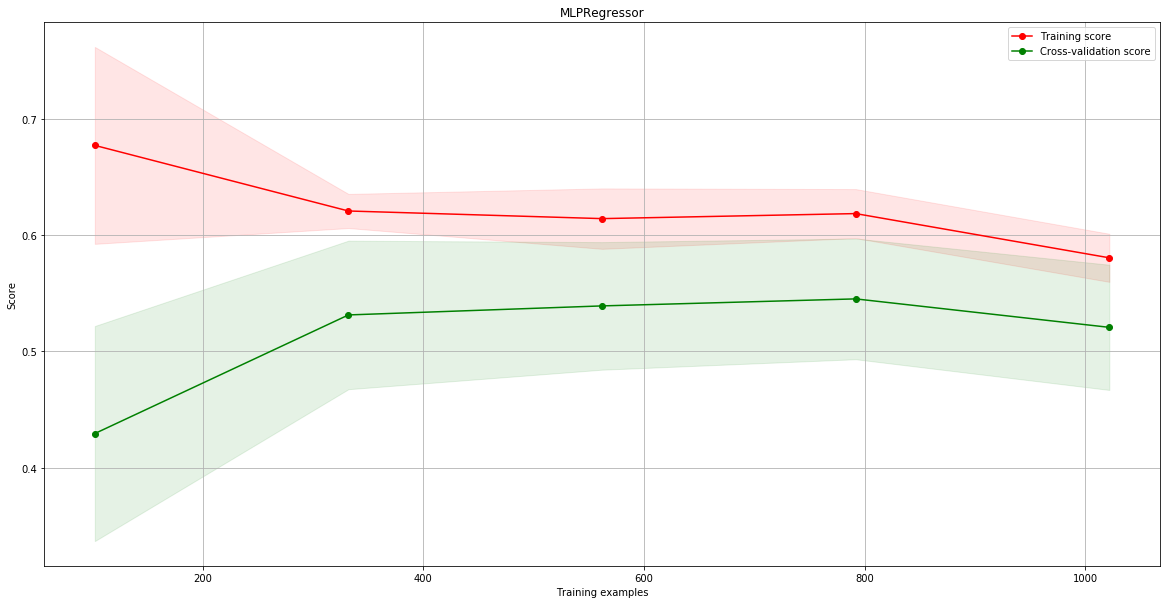

In [11]:
title = r"MLPRegressor"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(reg4, title, X_train, y_train, cv=cv, n_jobs=-1)
plt.show()

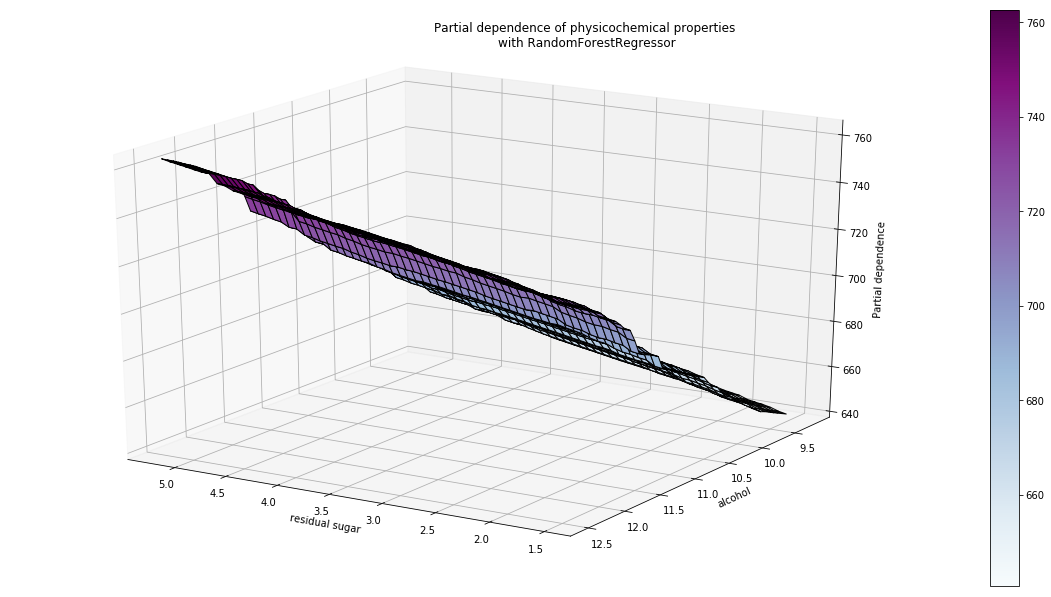

In [12]:
fig = plt.figure(figsize=(16, 8))
#fig.suptitle('Partial dependence of physicochemical properties with MLPRegressor')
plt.subplots_adjust(top=0.9)  # tight_layout causes overlap with suptitle
target_feature = (3,10)
pdp, axes = partial_dependence(ereg, X_train, target_feature, grid_resolution=50)
XX, YY = np.meshgrid(axes[0], axes[1])
Z = pdp[0].T
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1, cmap=plt.cm.BuPu, edgecolor='k')
ax.set_xlabel(column_names[target_feature[0]])
ax.set_ylabel(column_names[target_feature[1]])
ax.set_zlabel('Partial dependence')
#  pretty init view
ax.view_init(elev=22, azim=122)
plt.colorbar(surf)
plt.suptitle('Partial dependence of physicochemical properties \nwith RandomForestRegressor')
plt.subplots_adjust(top=0.9)
plt.show()

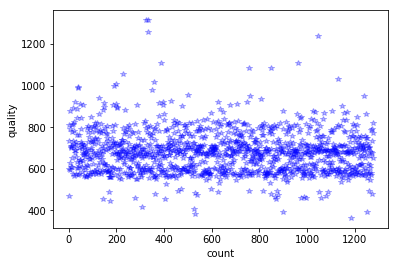

In [13]:
matrix = np.asmatrix(y_temp_train[['new_quality']])
np.array(matrix[:,0])
plt.plot(np.array(matrix[:,0]), 'b*', alpha=0.3)
plt.xlabel("count")
plt.ylabel("quality")
plt.show()

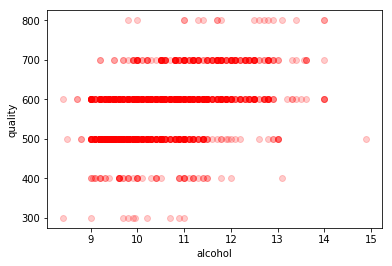

In [14]:
colors = (1,0,0)
matrix = np.asmatrix(rw[['alcohol', 'quality']]);
plt.scatter(np.array(matrix[:,0]), np.array(matrix[:,1]), c=colors, alpha=0.2)
plt.xlabel("alcohol")
plt.ylabel("quality")
plt.show()

In [15]:
ereg_predict = np.transpose(np.asmatrix(ereg.predict(X_test)))
ereg_predict
ereg_predict.shape
y_temp_test.shape
y_temp_test['predict'] = np.asarray(ereg_predict)
ytt = y_temp_test['predict']-y_temp_test['add']
y_temp_test

quality         add  new_quality     predict
1508      500   62.490071   562.490071  624.172010
718       600  104.821744   704.821743  731.765330
1370      500   72.020430   572.020430  596.931837
579       500  116.696608   616.696608  731.768171
498       700  121.019951   821.019951  770.976971
1586      500   50.624476   550.624476  570.750598
531       600  119.393628   719.393628  726.074433
254       500  153.289930   653.289930  663.043511
698       400  108.434625   508.434625  646.235966
665       700  107.570807   807.570807  754.046420
1297      600   74.494509   674.494509  587.341425
472       600  123.449064   723.449064  699.247565
756       400  104.120421   504.120421  632.145306
700       600  106.130733   706.130733  694.701776
1476      500   64.982343   564.982343  593.551077
545       400  120.432482   520.432482  670.717441
338       500  139.874209   639.874209  707.778206
945       500   93.310595   593.310595  671.996896
841       500   98.782092   598.782092  637.088522
1458      500   67.098009   567.098009  580.411701
1348      600   72.186645   672.186645  621.623845
1172      600   81.610069   681.610069  679.519976
20        500  321.705474   821.705474  775.903617
731       600  104.037829   704.037829  670.667197
1011      500   89.951830   589.951830  635.106838
779       700   99.975391   799.975391  758.283597
479       500  124.197621   624.197620  654.082712
83        600  210.052624   810.052624  803.019030
1427      600   68.484705   668.484705  606.405405
1549      500   58.464403   558.464403  586.234582
...       ...         ...          ...         ...
1346      500   73.458849   573.458849  587.257289
1119      500   85.119893   585.119893  611.402168
1318      500   74.689632   574.689632  617.593379
1223      600   79.035197   679.035197  657.607991
514       500  122.081914   622.081914  639.892614
279       300  151.084110   451.084110  668.748167
553       600  117.439753   717.439753  665.557694
702       600  105.982375   705.982375  628.614795
328       600  140.438362   740.438362  758.909425
1350      600   72.096306   672.096306  661.170019
226       600  156.645101   756.645101  764.142727
117       700  194.182127   894.182127  780.765614
542       700  117.805324   817.805323  758.065088
1051      600   87.302669   687.302669  674.516176
486       600  122.900520   722.900520  740.037085
842       600   97.762100   697.762100  651.372449
1232      500   79.588768   579.588768  597.102505
782       600  100.847573   700.847573  686.088864
298       600  145.822533   745.822533  735.716493
946       300   95.282708   395.282708  612.787347
974       600   90.583476   690.583476  627.544530
799       700   99.186052   799.186051  737.907498
403       700  129.817434   829.817434  738.433309
1469      400   67.149227   467.149227  660.082815
311       600  143.385169   743.385169  690.144107
317       500  143.552790   643.552790  667.698644
608       500  113.952441   613.952441  640.069935
843       500   98.757562   598.757562  648.040829
127       300  191.894043   491.894043  758.491708
1143      600   82.876041   682.876041  647.292838

[320 rows x 4 columns]

[403.85634211 449.99813307 496.13992403 542.281715   588.42350596
 634.56529692 680.70708788]


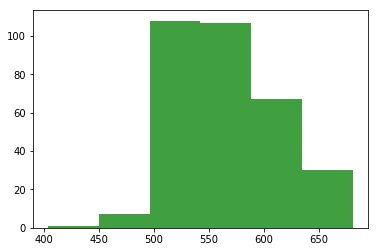

In [16]:
n, bins, patches = plt.hist(np.asarray(ytt), 6, facecolor='g', alpha=0.75)
print(bins)
plt.show()

In [17]:
min_ytt = ytt.min()
max_ytt = ytt.max()
bins = 6
spacing = (max_ytt - min_ytt) / 6
min_ytt, max_ytt, bins, spacing
bin=np.round(bins - (max_ytt-ytt-spacing)/spacing + .5)
y_temp_test['quality_predict'] = bin*100
y_temp_test

quality         add  new_quality     predict  quality_predict
1508      500   62.490071   562.490071  624.172010            500.0
718       600  104.821744   704.821743  731.765330            600.0
1370      500   72.020430   572.020430  596.931837            400.0
579       500  116.696608   616.696608  731.768171            600.0
498       700  121.019951   821.019951  770.976971            700.0
1586      500   50.624476   550.624476  570.750598            400.0
531       600  119.393628   719.393628  726.074433            600.0
254       500  153.289930   653.289930  663.043511            400.0
698       400  108.434625   508.434625  646.235966            400.0
665       700  107.570807   807.570807  754.046420            700.0
1297      600   74.494509   674.494509  587.341425            400.0
472       600  123.449064   723.449064  699.247565            500.0
756       400  104.120421   504.120421  632.145306            400.0
700       600  106.130733   706.130733  694.701776            600.0
1476      500   64.982343   564.982343  593.551077            400.0
545       400  120.432482   520.432482  670.717441            500.0
338       500  139.874209   639.874209  707.778206            500.0
945       500   93.310595   593.310595  671.996896            500.0
841       500   98.782092   598.782092  637.088522            400.0
1458      500   67.098009   567.098009  580.411701            400.0
1348      600   72.186645   672.186645  621.623845            500.0
1172      600   81.610069   681.610069  679.519976            600.0
20        500  321.705474   821.705474  775.903617            300.0
731       600  104.037829   704.037829  670.667197            500.0
1011      500   89.951830   589.951830  635.106838            500.0
779       700   99.975391   799.975391  758.283597            700.0
479       500  124.197621   624.197620  654.082712            400.0
83        600  210.052624   810.052624  803.019030            600.0
1427      600   68.484705   668.484705  606.405405            400.0
1549      500   58.464403   558.464403  586.234582            400.0
...       ...         ...          ...         ...              ...
1346      500   73.458849   573.458849  587.257289            400.0
1119      500   85.119893   585.119893  611.402168            400.0
1318      500   74.689632   574.689632  617.593379            500.0
1223      600   79.035197   679.035197  657.607991            500.0
514       500  122.081914   622.081914  639.892614            400.0
279       300  151.084110   451.084110  668.748167            400.0
553       600  117.439753   717.439753  665.557694            500.0
702       600  105.982375   705.982375  628.614795            400.0
328       600  140.438362   740.438362  758.909425            600.0
1350      600   72.096306   672.096306  661.170019            600.0
226       600  156.645101   756.645101  764.142727            600.0
117       700  194.182127   894.182127  780.765614            500.0
542       700  117.805324   817.805323  758.065088            700.0
1051      600   87.302669   687.302669  674.516176            500.0
486       600  122.900520   722.900520  740.037085            600.0
842       600   97.762100   697.762100  651.372449            500.0
1232      500   79.588768   579.588768  597.102505            400.0
782       600  100.847573   700.847573  686.088864            500.0
298       600  145.822533   745.822533  735.716493            600.0
946       300   95.282708   395.282708  612.787347            400.0
974       600   90.583476   690.583476  627.544530            400.0
799       700   99.186052   799.186051  737.907498            700.0
403       700  129.817434   829.817434  738.433309            600.0
1469      400   67.149227   467.149227  660.082815            600.0
311       600  143.385169   743.385169  690.144107            500.0
317       500  143.552790   643.552790  667.698644            400.0
608       500  113.952441   613.952441  640.069935            

In [23]:
y_temp_test['compare'] = np.abs((y_temp_test['quality'] - y_temp_test['quality_predict'])/100) <= 1
y_temp_test

quality         add  new_quality     predict  quality_predict  compare
1508      500   62.490071   562.490071  624.172010            500.0     True
718       600  104.821744   704.821743  731.765330            600.0     True
1370      500   72.020430   572.020430  596.931837            400.0     True
579       500  116.696608   616.696608  731.768171            600.0     True
498       700  121.019951   821.019951  770.976971            700.0     True
1586      500   50.624476   550.624476  570.750598            400.0     True
531       600  119.393628   719.393628  726.074433            600.0     True
254       500  153.289930   653.289930  663.043511            400.0     True
698       400  108.434625   508.434625  646.235966            400.0     True
665       700  107.570807   807.570807  754.046420            700.0     True
1297      600   74.494509   674.494509  587.341425            400.0    False
472       600  123.449064   723.449064  699.247565            500.0     True
756       400  104.120421   504.120421  632.145306            400.0     True
700       600  106.130733   706.130733  694.701776            600.0     True
1476      500   64.982343   564.982343  593.551077            400.0     True
545       400  120.432482   520.432482  670.717441            500.0     True
338       500  139.874209   639.874209  707.778206            500.0     True
945       500   93.310595   593.310595  671.996896            500.0     True
841       500   98.782092   598.782092  637.088522            400.0     True
1458      500   67.098009   567.098009  580.411701            400.0     True
1348      600   72.186645   672.186645  621.623845            500.0     True
1172      600   81.610069   681.610069  679.519976            600.0     True
20        500  321.705474   821.705474  775.903617            300.0    False
731       600  104.037829   704.037829  670.667197            500.0     True
1011      500   89.951830   589.951830  635.106838            500.0     True
779       700   99.975391   799.975391  758.283597            700.0     True
479       500  124.197621   624.197620  654.082712            400.0     True
83        600  210.052624   810.052624  803.019030            600.0     True
1427      600   68.484705   668.484705  606.405405            400.0    False
1549      500   58.464403   558.464403  586.234582            400.0     True
...       ...         ...          ...         ...              ...      ...
1346      500   73.458849   573.458849  587.257289            400.0     True
1119      500   85.119893   585.119893  611.402168            400.0     True
1318      500   74.689632   574.689632  617.593379            500.0     True
1223      600   79.035197   679.035197  657.607991            500.0     True
514       500  122.081914   622.081914  639.892614            400.0     True
279       300  151.084110   451.084110  668.748167            400.0     True
553       600  117.439753   717.439753  665.557694            500.0     True
702       600  105.982375   705.982375  628.614795            400.0    False
328       600  140.438362   740.438362  758.909425            600.0     True
1350      600   72.096306   672.096306  661.170019            600.0     True
226       600  156.645101   756.645101  764.142727            600.0     True
117       700  194.182127   894.182127  780.765614            500.0    False
542       700  117.805324   817.805323  758.065088            700.0     True
1051      600   87.302669   687.302669  674.516176            500.0     True
486       600  122.900520   722.900520  740.037085            600.0     True
842       600   97.762100   697.762100  651.372449            500.0     True
1232      500   79.588768   579.588768  597.102505            400.0     True
782       600  100.847573   700.847573  686.088864            500.0     True
298       600  145.822533   745.822533  735.716493            600.0     True
946       300   95.282708   395.282708  612.787347            400.0     True
97

In [24]:
counts = y_temp_test.compare.value_counts()
counts[True] / (counts[True] + counts[False])

0.88125

[ 10.  52. 681. 638. 199.  18.]


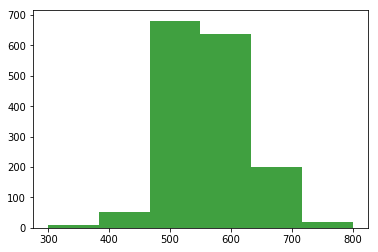

In [22]:
n, bins, patches = plt.hist(np.asarray(data['quality']), 6, facecolor='g', alpha=0.75)
print(n)
plt.show()

### 